In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
##independent features
X=pd.DataFrame(iris['data'],columns=['sepal length in cm','sepal width','petal length','petal width'])

In [6]:
##dependent features
y=iris['target']

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [10]:
#apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.38461538461538464, 0.5, 'x[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'

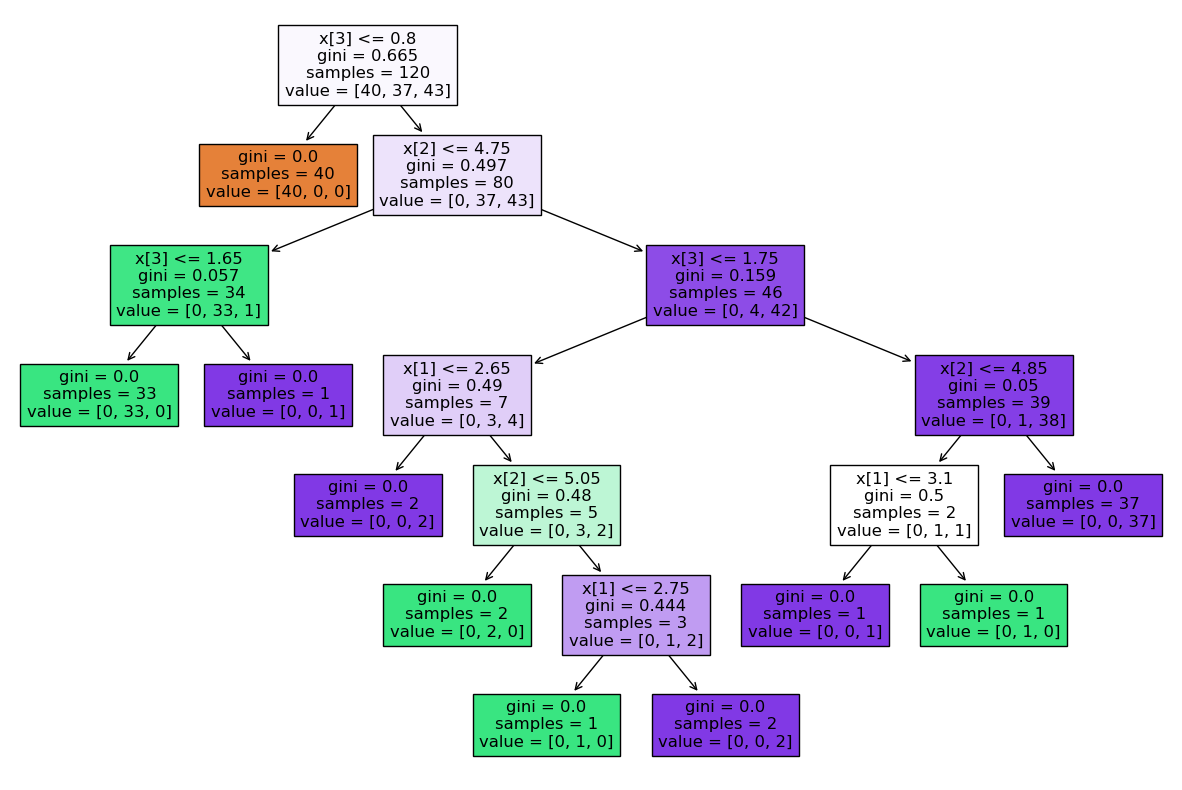

In [13]:
##Visualize the DecisionTree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [14]:
y_pred = treeclassifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Decision Tree Classifier Prepruning and Hyperparameter tuning

In [16]:
param = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2']
}

In [17]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier()
grid = GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [21]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [22]:
grid.best_score_

0.95

In [24]:
y_pred1 = grid.predict(X_test)

In [25]:
cm = confusion_matrix(y_test,y_pred1)
print(cm)
print(classification_report(y_test,y_pred1))

[[10  0  0]
 [ 0 10  3]
 [ 0  2  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.77      0.80        13
           2       0.62      0.71      0.67         7

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.84        30



In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred1)
score

0.8333333333333334